In [0]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


1) **Clone repository**

In [0]:
!git clone https://github.com/genigarus/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 167, done.
remote: Total 167 (delta 0), reused 0 (delta 0), pack-reused 167
Receiving objects: 100% (167/167), 12.74 MiB | 33.98 MiB/s, done.
Resolving deltas: 100% (12/12), done.


2) Download **'yolov3-spp-ultralytics.pt' file** from [here](https://drive.google.com/open?id=1LezFG5g3BCW6iYaV89B2i64cqEUZD7e0) and upload it in your drive.

3) Connect to your google drive using below code:

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


4) Now the runtime consist of below folders.

In [0]:
!ls

gdrive	sample_data  YoloV3


5) Create **weights** folder in **YoloV3**.

6) Drag the **''yolov3-spp-ultralytics.pt' file** from gdrive to weights folder in YoloV3 as shown below:

![](https://raw.githubusercontent.com/genigarus/YoloV3/master/Assets/im1.png)


7) Ensure that the following highlighted files are present as shown.

![](https://raw.githubusercontent.com/genigarus/YoloV3/master/Assets/im2.png)


8) Change current working directory to YoloV3.



In [0]:
cd YoloV3/

/content/YoloV3


In [0]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png   weights


Execute to check if Yolo v3 is running properly.

In [0]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-04-24 22:35:25.344131: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 7001.01it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 131.18it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 8164.89it/s

## Training Yolo V3 on custom dataset for Alex class
---

In [0]:
!python train.py --data data/customdata/custom.data --batch 16 --cache --cfg cfg/yolov3-custom.cfg --epochs 1000 --nosave

Streaming output truncated to the last 5000 lines.
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 13/13 [00:09<00:00,  1.31it/s]
                 all       200       202         0         0    0.0118         0

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
     2/999     10.5G      4.56      2.76         0      7.32        19       512: 100% 13/13 [00:13<00:00,  1.05s/it]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 13/13 [00:10<00:00,  1.30it/s]
                 all       200       202         0         0     0.132         0

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
     3/999     10.5G      3.03      2.38         0       5.4        19       512: 100% 13/13 [00:13<00:00,  1.05s/it]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 13/13 [00:09<00:00,  1.43it/s]
                 all       200   

## Alex Detection
---

In [0]:
!python detect.py --conf-thres 0.1 --output "../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/out_out"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/500 data/customdata/images/img001.jpg: 512x448 1 alexs, Done. (0.024s)
image 2/500 data/customdata/images/img002.jpg: 512x512 1 alexs, Done. (0.023s)
image 3/500 data/customdata/images/img003.jpg: 512x448 1 alexs, Done. (0.021s)
image 4/500 data/customdata/images/img004.jpg: 320x512 1 alexs, Done. (0.027s)
image 5/500 data/customdata/images/img005.jpg: 320x512 1 alexs, Done. (0.016s)
image 6/500 data/customdata/images/img006.jpg: 384x512 1 alexs, Done.

## Results
---

### 1) Alex detection in images

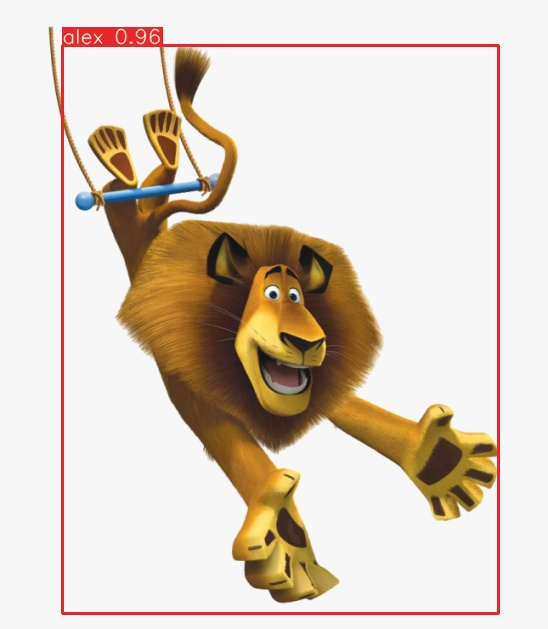

In [0]:
Image(filename='../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/out_out/img001.jpg', width=600)

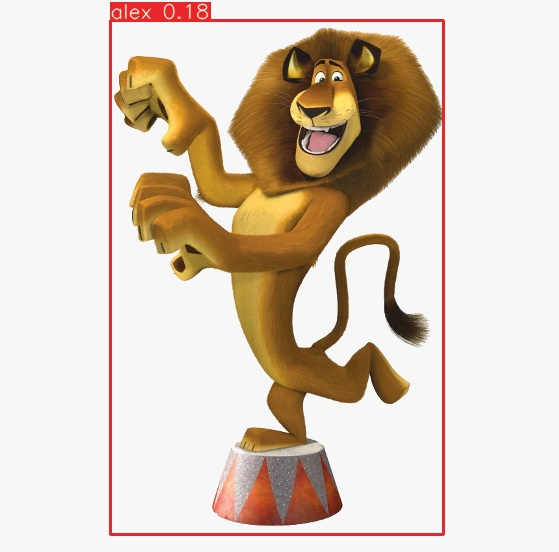

In [0]:
Image(filename='../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/out_out/img002.jpg', width=600)

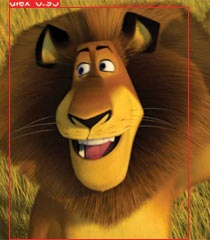

In [0]:
Image(filename='../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/out_out/img003.jpg', width=600)

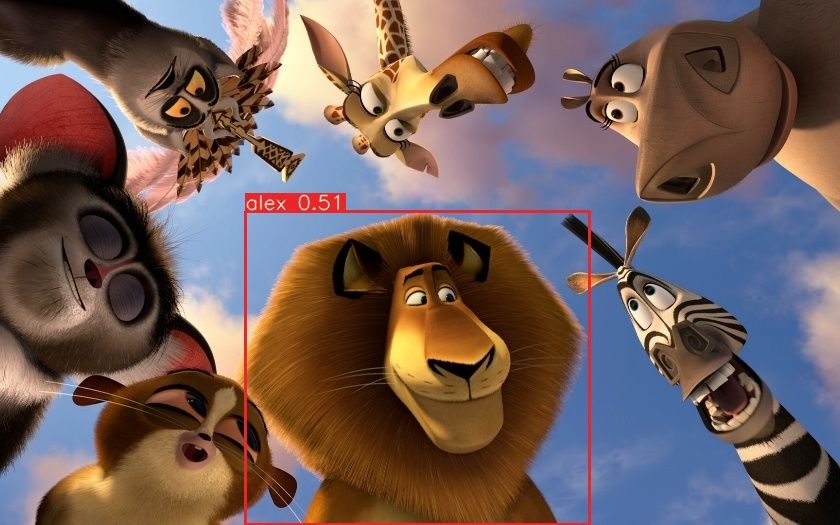

In [0]:
Image(filename='../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/out_out/img020.jpg', width=600)

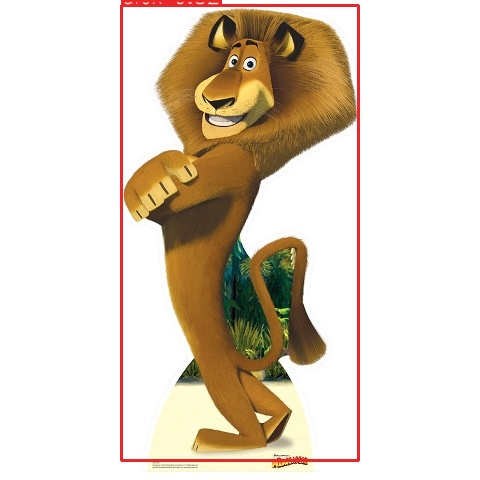

In [0]:
Image(filename='../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/out_out/img025.jpg', width=600)

In [0]:
import PIL

def create_collage(width, height, listofimages):
    cols = 3
    rows = 3
    thumbnail_width = width//cols
    thumbnail_height = height//rows
    size = thumbnail_width, thumbnail_height
    new_im = PIL.Image.new('RGB', (width, height))
    ims = []
    for p in listofimages:
        im = PIL.Image.open(p)
        im.thumbnail(size)
        ims.append(im)
    i = 0
    x = 0
    y = 0
    for col in range(cols):
        for row in range(rows):
            new_im.paste(ims[i], (x, y))
            i += 1
            y += thumbnail_height
        x += thumbnail_width
        y = 0

    new_im.save("../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/Collage.jpg")


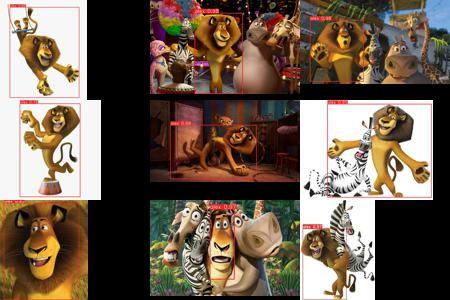

In [0]:
listofimages = ['../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/out_out/img{0:03d}.jpg'.format(i) for i in range(1, 10)]
create_collage(450, 300, listofimages)

Image(filename='../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/Collage.jpg', width=800, height=600)

### Alex detection in video
---

1) **Alex and his Trapeze Americano**

Youtube Link : 

[![](https://img.youtube.com/vi/e1D-shteTAI/0.jpg)](https://www.youtube.com/watch?v=e1D-shteTAI)

In [0]:
!python detect.py --source "../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/Alex_Gia_Trapeze_Americano.mp4" --conf-thres 0.4 --output "../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/video_out_Alex_Gia_Trapeze_Americano"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.4, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/video_out_Alex_Gia_Trapeze_Americano', save_txt=False, source='../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/Alex_Gia_Trapeze_Americano.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/3240) ../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/Alex_Gia_Trapeze_Americano.mp4: 320x512 Done. (0.019s)
video 1/1 (2/3240) ../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/Alex_Gia_Trapeze_Americano.mp4: 320x512 Done. (0.016s)
video 1/1 (3/3240) ../gdrive/My Drive/EVA4/Session13/YoloV3Assignment/Alex_Gia_Trapeze_Americano.mp4: 320x512 Done. (0.018s)
v